**Nesta seção, vamos aprender alguns conceitos básicos sobre Machine Learning**

Após a introdução a Scikit-Learn apresentada, o objetivo agora é compreender a diferença entre aprendizado **Supervisionado** e **Não supervisionado**.

### Aprendizado Supervisionado

Vamos explorar um pouco mais problemas de *Classificação* e *Regressão*.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import seaborn; seaborn.set()

In [3]:
from sklearn.linear_model import LinearRegression

Para mais referências, acesse este [link](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [4]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [5]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


Retomando o exemplo sobre Regressão:

In [6]:
x = np.arange(10)
y = 2 * x + 1

In [7]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


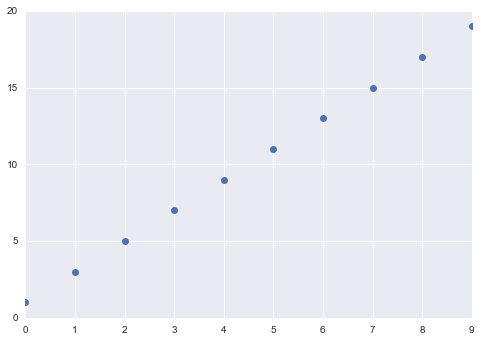

In [8]:
plt.plot(x, y, 'o');

In [10]:
# Dataset retirado do sklearn 2D: (amostras = 3 x features = 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [12]:
# Treinar o modelo a partir de amostras conhecidas
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [14]:
# underscore no final indica um parâmetro do modelo ajustado
print(model.coef_)
print(model.intercept_)

[ 2.]
1.0


In [18]:
# erro residual ajustado durante o treino
model.residues_

/Users/asivole/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


7.6200430943719212e-31

### Em aprendizados Supervisionados...

* Conjunto de dados possui atributos e etiquetas (labels, outputs, respostas)
* Modelo aprende com dados existentes, através de respostas conhecidas

Alguns exemplos deste tipo de aprendizado:
* Classificação da Iris
* Identificação de pessoas em uma foto (Facebook tagging)
* Sistemas de recomendação (Netflix, Spotify)
* Avaliação de custo de imóveis (California Housing)


Fazem parte de aprendizados supervisionados:
* Classificação (saída é discreto)
* Regressão (saída é contínuo)

#### Exemplo de Classificação

In [20]:
# KNN k-nearest neighbor
# http://scikit-learn.org/stable/modules/neighbors.html
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# Cria modelo
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Treina modelo
knn.fit(X, y)

# Que tipo de iris possui 3 cm x 5 cm de sepala e 4 cm x 2 cm de pétala?
# Chamando o preditor do modelo treinado
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


Podemos ter também probabilidade entre classes:

In [23]:
print (iris.target_names)
knn.predict_proba([[3, 5, 4, 2],])

['setosa' 'versicolor' 'virginica']


array([[ 0. ,  0.8,  0.2]])

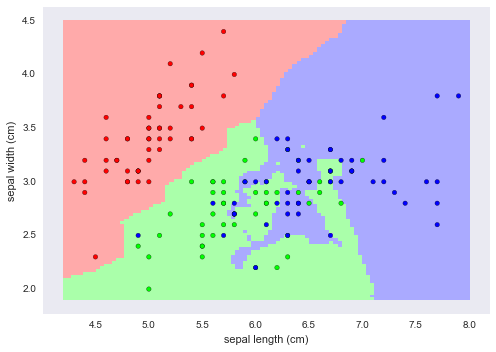

In [24]:
from fig_code import plot_iris_knn
plot_iris_knn()

**Exercício Relâmpago**
Vamos usar um estimador diferente para treinar o modelo no mesmo problema: sklearn.svm.SVC

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Você não necessariamente precisa saber o que é isso para utiliza-lo. Estamos apenas experimentando interfaces.

Se você terminar cedo, tente gerar um plot similar ao anterior para este novo modelo.

In [26]:
from sklearn.svm import SVC

#### Exemplo de Regressão

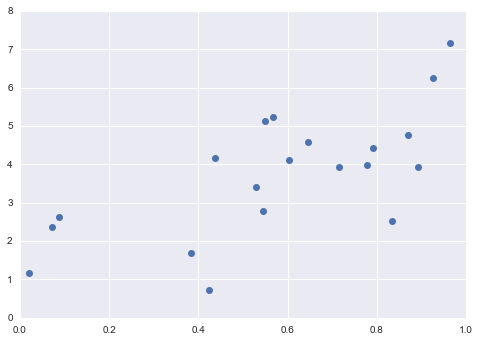

In [29]:
# Gerando dados aleatorios
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

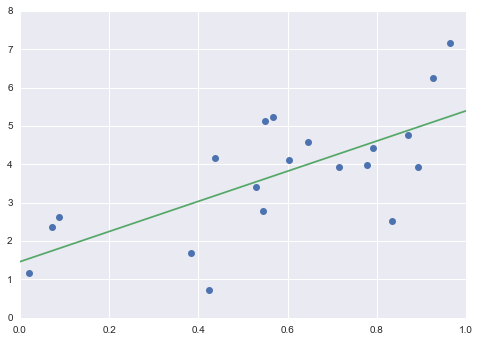

In [34]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

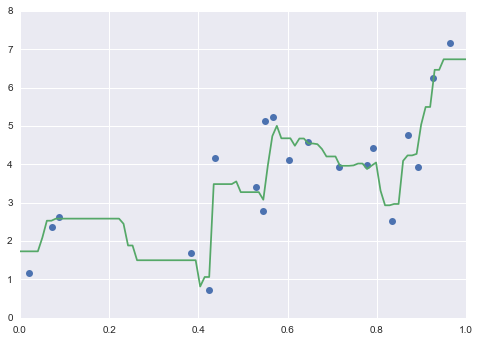

In [31]:
# Podemos tentar modelos mais sofisticados
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

** Exercício **

Vamos explorar o RandomForestRegressor acessando o 'help'.

Coloque um '*?*' após o objeto instanciado.

Quais argumentos estão disponíveis para RandomForestRegressor?

Como tais argumentos alteram o gráfico gerado?

Esses argumentos são conhecidos como **hiper-parâmetros**. Nós os discutiremos mais adiante como ajusta-los na seção de validação.

In [36]:
RandomForestRegressor?

### Aprendizado Não-Supervisionado

Vamos explorar problemas de *Redução de Dimensões* e *Clusterização*